## Check Solubility of known drugs
These values will be used to estimate the desired solubility of new molecules for the SLogP scoring component of REINVENT2.0
SLogP will be transformed to a scale of 0(low solubility) - 1 (high solubility) using a reverse sigmoid transformation with inflexion point of 2 (from below estimations)

(array([  31.,   91.,  278.,  558., 1017., 1522., 1029.,  376.,   90.,
          26.]),
 array([-4.9424 , -3.45087, -1.95934, -0.46781,  1.02372,  2.51525,
         4.00678,  5.49831,  6.98984,  8.48137,  9.9729 ]),
 <BarContainer object of 10 artists>)

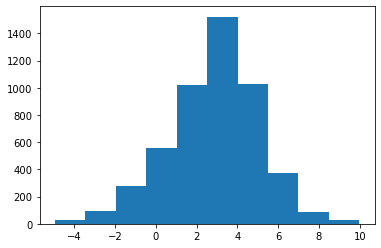

In [17]:
%matplotlib inline
import pandas as pd
from rdkit.Chem.Descriptors import MolLogP
from rdkit.Chem import MolFromSmiles
import matplotlib.pyplot as plt

df=pd.read_csv("../data/known_drugs.tsv", delimiter='\t', header=None)
df=df.loc[:,1]
smiles=list(df)
mols=[]
for smi in smiles:
    mol=MolFromSmiles(smi)
    mols += [mol]

logps=[]
for mol in  mols:
    logp=MolLogP(mol)
    logps += [logp]

logps_lim=[x for x in logps if x<10 and x>-5]
    
plt.hist(logps_lim)